Лаб 1
# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по определению оценки Weight Watcher - https://www.kaggle.com/datasets/joebeachcapital/dunkin-donuts-nutrition

Эта задача является очень актуальной для людей, следящих за своим здоровьем, для выявления зависимости оценки Weight Watcher продукта от количества содержащихся в нем калорий, жиров, холестерина, натрия, углеводов, клетчатки, сахара, белков.

Датасет состоит из файла:
- DunkinDonuts_1.csv - обучающая выборка 


Файл содержит следующие колонки:
- Item - название товара
- Calories - количество содержащихся в товаре калорий
- Total Fat (g) - все жиры (г)
- Saturated Fat (g) - насыщенные жиры (г)
- Trans Fat (g) - Транс-жиры (г)
- Cholesterol (mg) - Холестерин (мг)
- Sodium (mg) - Натрий (мг)
- Carbs (g) - Углеводы (г)
- Fiber (g) - Клетчатка (г)
- Sugars (g) - Сахара (г)
- Protein (g) - Белок (г)
- Weight Watcher Pnts - оценка Weight Watcher

# Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [2]:
data = pd.read_csv('C:/Users/dasha/OneDrive/Рабочий стол/Учеба/5 сем/ОАД/НИРС/DunkinDonuts_1.csv')

# 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,Category,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watcher Pnts
0,Cold Brew Coffee,"Cold Brew Coffee, Large",5,0,0,0,0,20,0,0,0,1,4
1,Cold Brew Coffee,"Cold Brew Coffee, Medium",5,0,0,0,0,15,0,0,0,0,5
2,Cold Brew Coffee,"Cold Brew Coffee, Small",5,0,0,0,0,10,0,0,0,0,5
3,Cold Brew Coffee,"Cold Brew Coffee with Cream, Large",120,12,6,0,35,65,2,0,2,2,126
4,Cold Brew Coffee,"Cold Brew Coffee with Cream, Medium",90,9,4.5,0,25,45,1,0,1,2,93.5


In [4]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(780, 13)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 780


In [6]:
# Список колонок
data.columns

Index(['Category', 'Item', 'Calories', 'Total Fat (g)', 'Saturated Fat (g)',
       'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)',
       'Fiber (g)', 'Sugars (g)', 'Protein (g)', 'Weight Watcher Pnts'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

Category               object
Item                   object
Calories               object
Total Fat (g)          object
Saturated Fat (g)      object
Trans Fat (g)          object
Cholesterol (mg)       object
Sodium (mg)            object
Carbs (g)              object
Fiber (g)              object
Sugars (g)             object
Protein (g)            object
Weight Watcher Pnts    object
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Category - 0
Item - 0
Calories - 0
Total Fat (g) - 0
Saturated Fat (g) - 0
Trans Fat (g) - 0
Cholesterol (mg) - 0
Sodium (mg) - 0
Carbs (g) - 0
Fiber (g) - 0
Sugars (g) - 0
Protein (g) - 0
Weight Watcher Pnts - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,Category,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watcher Pnts
count,780,780,780,780,780,780,780,780,780,780,780,780,780
unique,23,779,87,50,29,5,37,112,120,9,122,32,362
top,Hot Coffee,Ham and Cheese Rollups,170,0,0,0,0,180,35,0,0,4,5
freq,88,2,38,242,269,755,222,24,30,508,33,94,13


In [10]:
# Определим уникальные значения для категорий
data['Category'].unique()

array(['Cold Brew Coffee', 'Coolatta', 'Donuts', 'Frozen Coffee',
       'Hot Americano', 'Hot Cappuccino', 'Hot Chocolate', 'Hot Coffee',
       'Hot Latte', 'Hot Macchiato', 'Iced Americano', 'Iced Cappuccino',
       'Iced Coffee', 'Iced Latte', 'Iced Macchiato', 'Iced Tea',
       'Dunkin’ Refreshers', 'Kolache', 'Muffins', 'Sandwiches',
       'Soft Serve', 'Hash Browns', 'Dunkin’ Bowls'], dtype=object)

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='Calories', ylabel='Weight Watcher Pnts'>

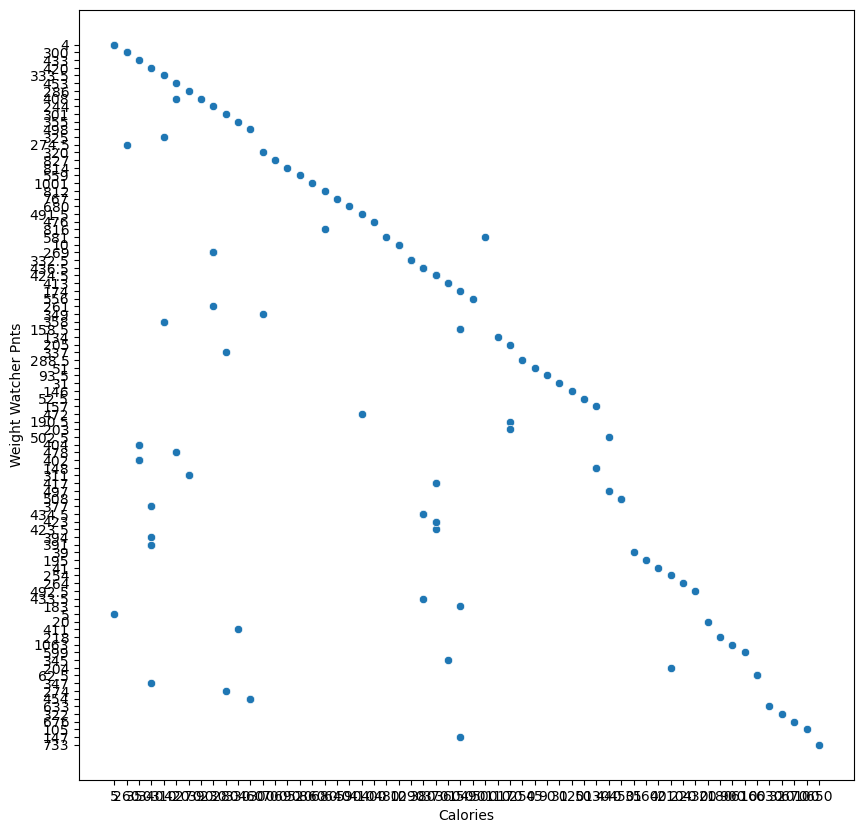

In [11]:
subset_data = data.iloc[::6, :]
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Calories', y='Weight Watcher Pnts', data=subset_data)

Можно видеть что между полями Calories и Weight Watcher Pnts пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет количество сахаров.

<Axes: xlabel='Calories', ylabel='Weight Watcher Pnts'>

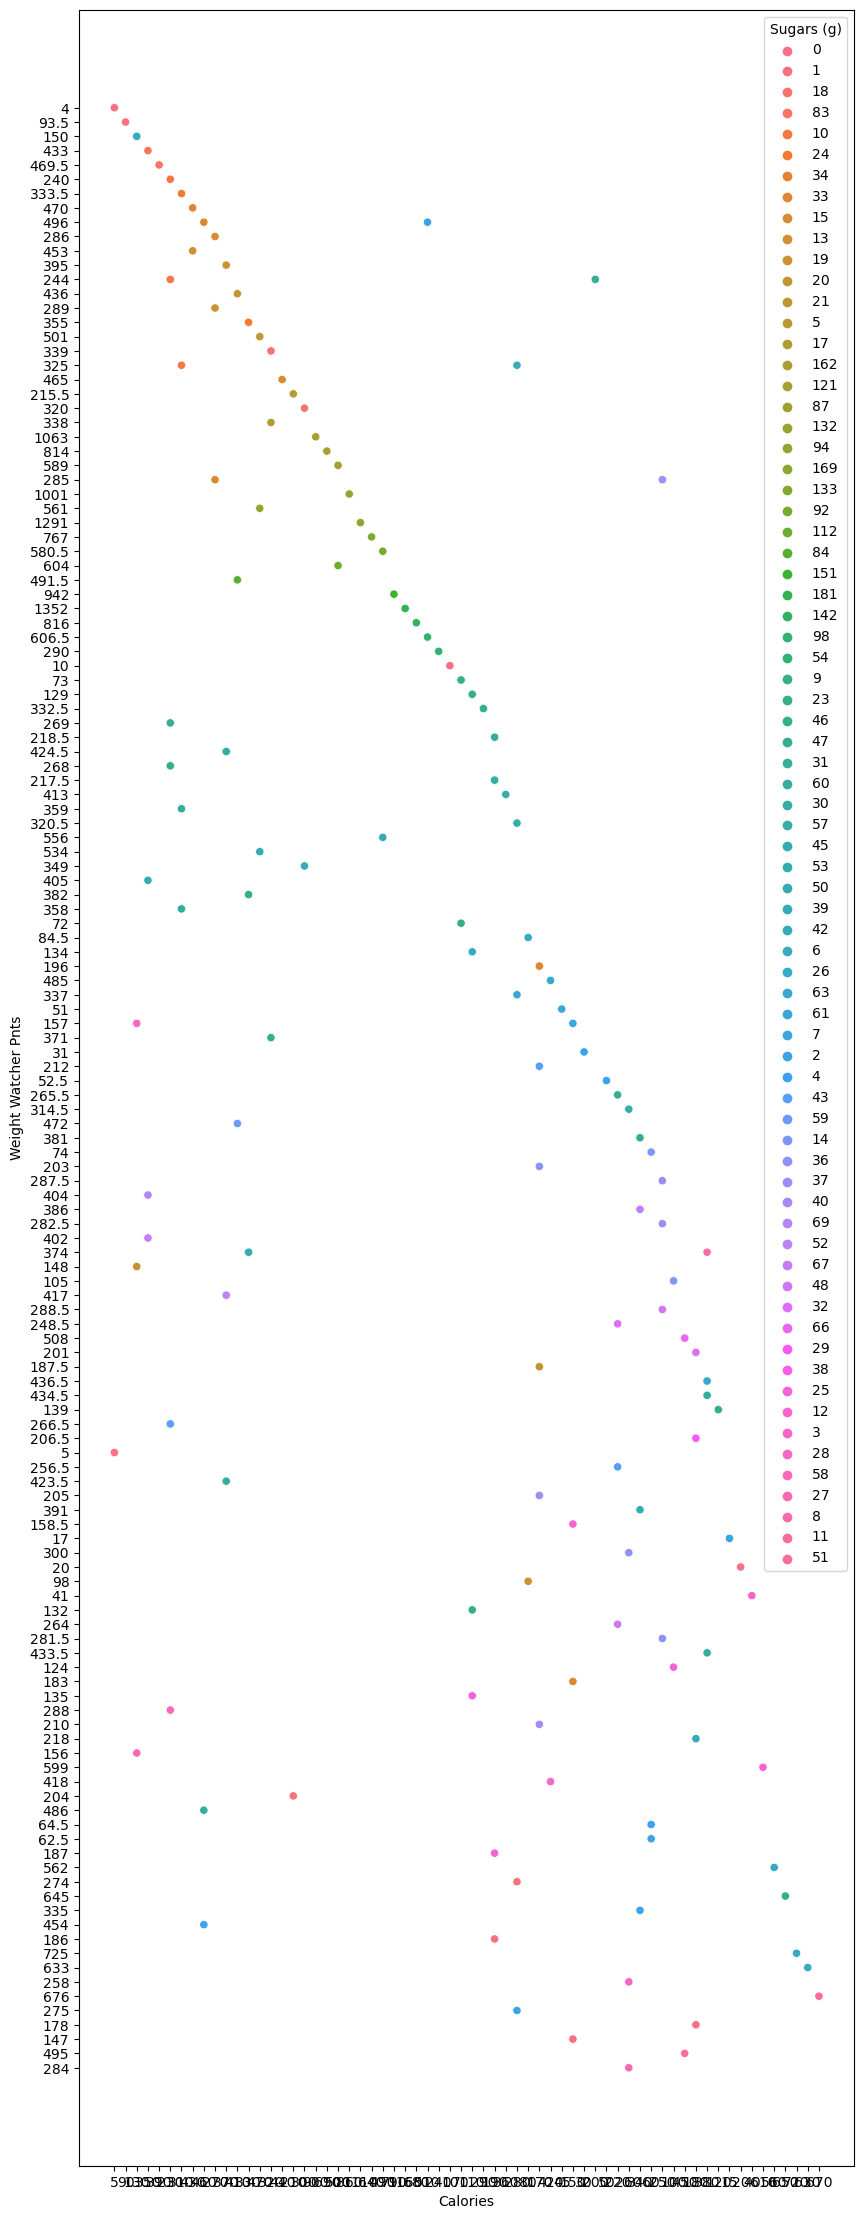

In [12]:
subset_data = data.iloc[::4, :]
fig, ax = plt.subplots(figsize=(10,28))
sns.scatterplot(ax=ax, x='Calories', y='Weight Watcher Pnts', hue='Sugars (g)', data = subset_data)

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

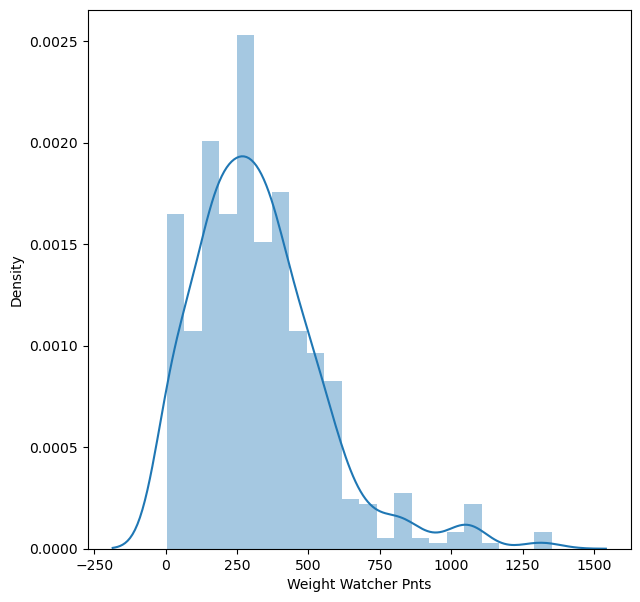

In [14]:
data = data[data['Weight Watcher Pnts'].apply(lambda x: x.replace('xa0', '').isdigit())]

data['Weight Watcher Pnts'] = pd.to_numeric(data['Weight Watcher Pnts'])
fig, ax = plt.subplots(figsize=(7,7)) 
sns.distplot(data['Weight Watcher Pnts'], ax=ax)
plt.show()

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

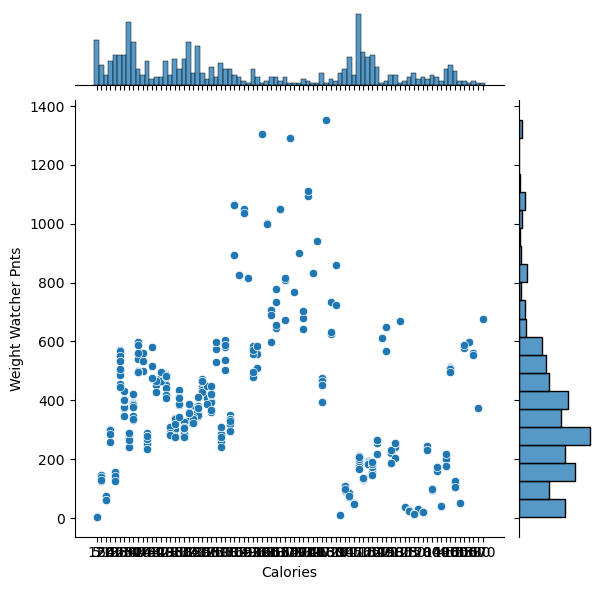

In [15]:
sns.jointplot(x='Calories', y='Weight Watcher Pnts', data=data)

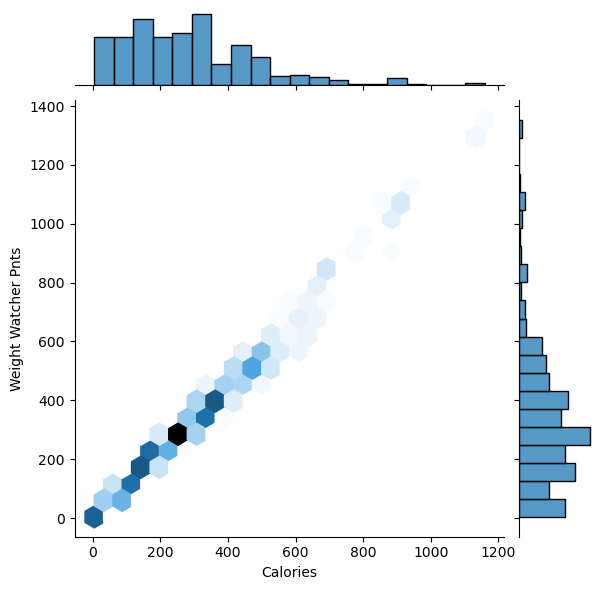

In [16]:
data['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')
data['Weight Watcher Pnts'] = pd.to_numeric(data['Weight Watcher Pnts'], errors='coerce')

sns.jointplot(x='Calories', y='Weight Watcher Pnts', data=data, kind="hex")

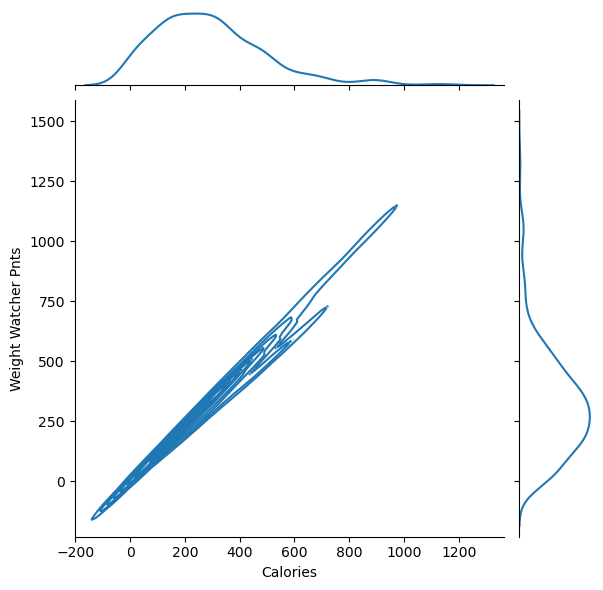

In [17]:
sns.jointplot(x='Calories', y='Weight Watcher Pnts', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

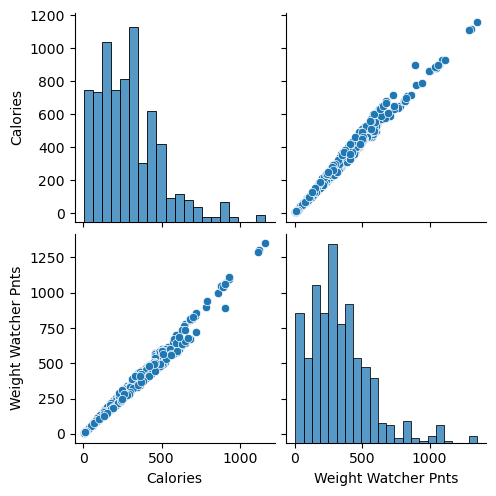

In [18]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

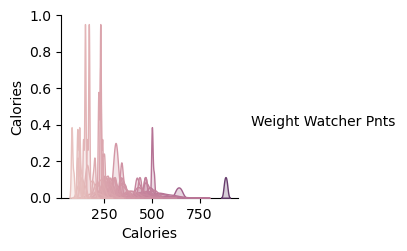

In [19]:
sns.pairplot(data, hue="Weight Watcher Pnts")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

<Axes: xlabel='Weight Watcher Pnts'>

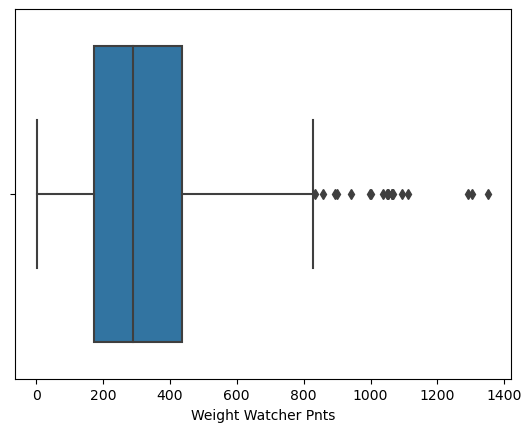

In [20]:
sns.boxplot(x=data['Weight Watcher Pnts'])

<Axes: ylabel='Weight Watcher Pnts'>

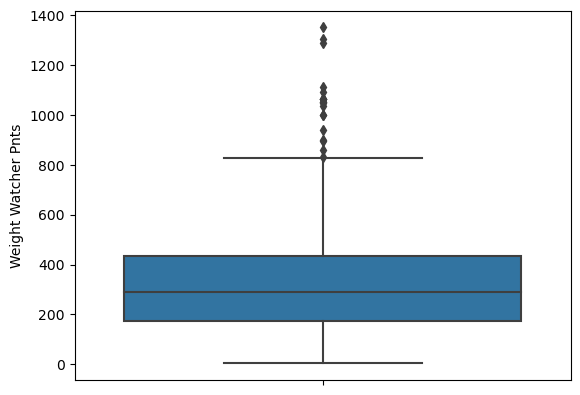

In [21]:
# По вертикали
sns.boxplot(y=data['Weight Watcher Pnts'])

<Axes: xlabel='Calories', ylabel='Weight Watcher Pnts'>

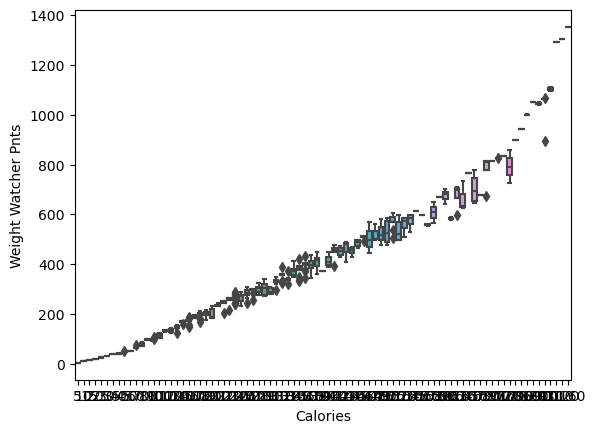

In [22]:
# Распределение параметра Weight Watcher Pnts сгруппированные по Calories.
sns.boxplot(x='Calories', y='Weight Watcher Pnts', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='Calories'>

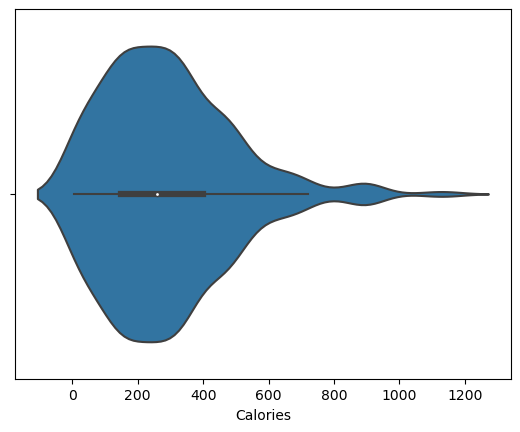

In [23]:
sns.violinplot(x=data['Calories'])

<Axes: xlabel='Calories', ylabel='Density'>

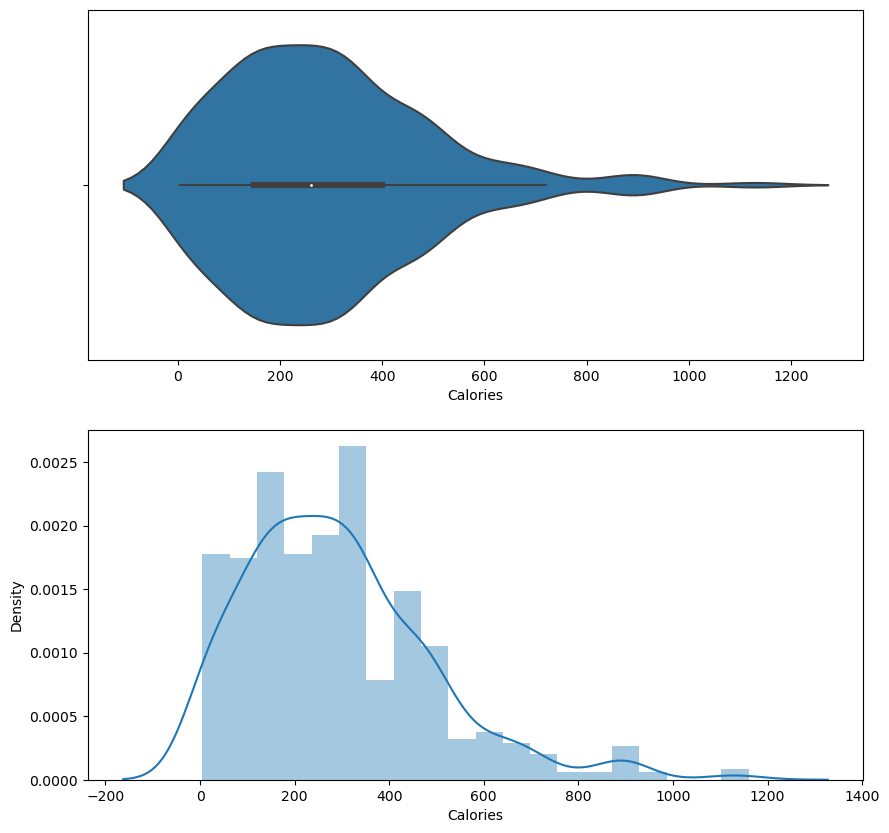

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Calories'])
sns.distplot(data['Calories'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<Axes: xlabel='Calories', ylabel='Weight Watcher Pnts'>

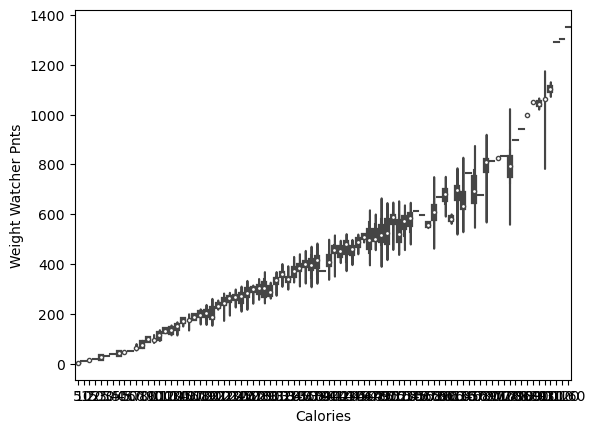

In [25]:
# Распределение параметра Weight Watcher Pnts сгруппированные по Calories.
sns.violinplot(x='Calories', y='Weight Watcher Pnts', data=data)

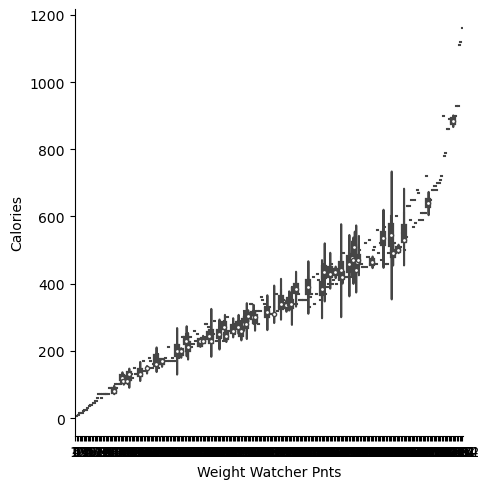

In [26]:
sns.catplot(y='Calories', x='Weight Watcher Pnts', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [40]:
data_1 = data
data_1['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')
data_1['Total Fat (g)'] = pd.to_numeric(data['Total Fat (g)'], errors='coerce')
data_1['Saturated Fat (g)'] = pd.to_numeric(data['Saturated Fat (g)'], errors='coerce')
data_1['Trans Fat (g)'] = pd.to_numeric(data['Trans Fat (g)'], errors='coerce')
data_1['Cholesterol (mg)'] = pd.to_numeric(data['Cholesterol (mg)'], errors='coerce')
data_1['Sodium (mg)'] = pd.to_numeric(data['Sodium (mg)'], errors='coerce')
data_1['Carbs (g)'] = pd.to_numeric(data['Carbs (g)'], errors='coerce')
data_1['Fiber (g)'] = pd.to_numeric(data['Fiber (g)'], errors='coerce')
data_1['Sugars (g)'] = pd.to_numeric(data['Sugars (g)'], errors='coerce')
data_1['Protein (g)'] = pd.to_numeric(data['Protein (g)'], errors='coerce')
data_1['Weight Watcher Pnts'] = pd.to_numeric(data['Weight Watcher Pnts'], errors='coerce')

correlation_matrix = data_1.corr()
print(correlation_matrix)

                     Calories  Total Fat (g)  Saturated Fat (g)  \
Calories             1.000000       0.733787           0.778064   
Total Fat (g)        0.733787       1.000000           0.936882   
Saturated Fat (g)    0.778064       0.936882           1.000000   
Trans Fat (g)        0.424505       0.350980           0.410784   
Cholesterol (mg)     0.484202       0.652586           0.496883   
Sodium (mg)          0.542210       0.709402           0.577124   
Carbs (g)            0.874601       0.329354           0.456800   
Fiber (g)            0.371017       0.397509           0.369995   
Sugars (g)           0.702308       0.092845           0.272697   
Protein (g)          0.549734       0.493169           0.385967   
Weight Watcher Pnts  0.993484       0.670049           0.740859   

                     Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbs (g)  \
Calories                  0.424505          0.484202     0.542210   0.874601   
Total Fat (g)             0.350980 

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [41]:
data_1.corr(method='pearson')

,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watcher Pnts
Calories,1.000000,0.733787,0.778064,0.424505,0.484202,0.542210,0.874601,0.371017,0.702308,0.549734,0.993484
Total Fat (g),0.733787,1.000000,0.936882,0.350980,0.652586,0.709402,0.329354,0.397509,0.092845,0.493169,0.670049
Saturated Fat (g),0.778064,0.936882,1.000000,0.410784,0.496883,0.577124,0.456800,0.369995,0.272697,0.385967,0.740859
Trans Fat (g),0.424505,0.350980,0.410784,1.000000,0.230702,0.011024,0.372617,-0.029327,0.383664,0.098182,0.440116
Cholesterol (mg),0.484202,0.652586,0.496883,0.230702,1.000000,0.704858,0.157064,0.206322,-0.031788,0.709330,0.413200
Sodium (mg),0.542210,0.709402,0.577124,0.011024,0.704858,1.000000,0.191794,0.509115,-0.110188,0.749571,0.455202
Carbs (g),0.874601,0.329354,0.456800,0.372617,0.157064,0.191794,1.000000,0.220862,0.937630,0.296881,0.918263
Fiber (g),0.371017,0.397509,0.369995,-0.029327,0.206322,0.509115,0.220862,1.000000,-0.012181,0.390713,0.323783
Sugars (g),0.702308,0.092845,0.272697,0.383664,-0.031788,-0.110188,0.937630,-0.012181,1.000000,0.103441,0.776627
Protein (g),0.549734,0.493169,0.385967,0.098182,0.709330,0.749571,0.296881,0.390713,0.103441,1.000000,0.483835


In [42]:
data_1.corr(method='kendall')

,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watcher Pnts
Calories,1.000000,0.573159,0.610308,0.232643,0.478500,0.556872,0.697229,0.388455,0.472396,0.469452,0.948785
Total Fat (g),0.573159,1.000000,0.865134,0.249107,0.563408,0.558657,0.252268,0.479016,0.025953,0.305328,0.522560
Saturated Fat (g),0.610308,0.865134,1.000000,0.269762,0.533251,0.511102,0.309512,0.445934,0.110421,0.286093,0.574041
Trans Fat (g),0.232643,0.249107,0.269762,1.000000,0.276296,0.077436,0.218514,0.005832,0.222146,0.130514,0.233560
Cholesterol (mg),0.478500,0.563408,0.533251,0.276296,1.000000,0.392698,0.254269,0.109808,0.144468,0.570746,0.448254
Sodium (mg),0.556872,0.558657,0.511102,0.077436,0.392698,1.000000,0.329659,0.431382,0.099551,0.548928,0.504213
Carbs (g),0.697229,0.252268,0.309512,0.218514,0.254269,0.329659,1.000000,0.239346,0.753991,0.341320,0.741520
Fiber (g),0.388455,0.479016,0.445934,0.005832,0.109808,0.431382,0.239346,1.000000,0.000232,0.210534,0.355601
Sugars (g),0.472396,0.025953,0.110421,0.222146,0.144468,0.099551,0.753991,0.000232,1.000000,0.214537,0.525510
Protein (g),0.469452,0.305328,0.286093,0.130514,0.570746,0.548928,0.341320,0.210534,0.214537,1.000000,0.433966


In [43]:
data_1.corr(method='spearman')

,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watcher Pnts
Calories,1.000000,0.740505,0.763765,0.280777,0.625938,0.742828,0.849830,0.485395,0.569636,0.620398,0.994250
Total Fat (g),0.740505,1.000000,0.956638,0.284554,0.669928,0.725187,0.350352,0.583317,0.028059,0.395251,0.692854
Saturated Fat (g),0.763765,0.956638,1.000000,0.303331,0.643594,0.674902,0.414193,0.530200,0.148114,0.372962,0.730892
Trans Fat (g),0.280777,0.284554,0.303331,1.000000,0.311258,0.094195,0.264482,0.006022,0.268709,0.155912,0.284136
Cholesterol (mg),0.625938,0.669928,0.643594,0.311258,1.000000,0.511778,0.343786,0.131723,0.166638,0.724007,0.593334
Sodium (mg),0.742828,0.725187,0.674902,0.094195,0.511778,1.000000,0.458874,0.544376,0.105329,0.692365,0.689632
Carbs (g),0.849830,0.350352,0.414193,0.264482,0.343786,0.458874,1.000000,0.290816,0.864760,0.459722,0.888293
Fiber (g),0.485395,0.583317,0.530200,0.006022,0.131723,0.544376,0.290816,1.000000,-0.002037,0.258281,0.448526
Sugars (g),0.569636,0.028059,0.148114,0.268709,0.166638,0.105329,0.864760,-0.002037,1.000000,0.262201,0.638288
Protein (g),0.620398,0.395251,0.372962,0.155912,0.724007,0.692365,0.459722,0.258281,0.262201,1.000000,0.585561


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

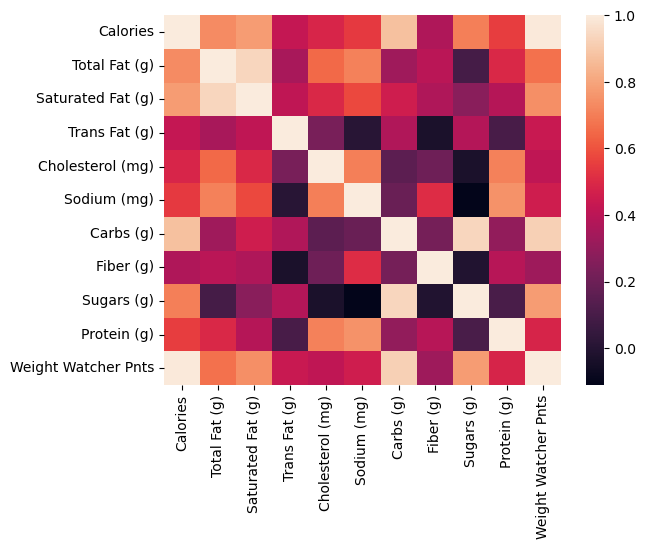

In [44]:
sns.heatmap(data_1.corr())

<Axes: >

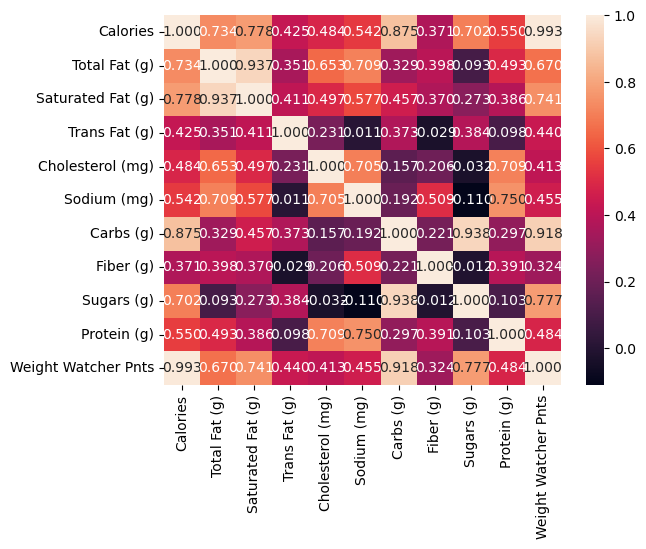

In [45]:
# Вывод значений в ячейках
sns.heatmap(data_1.corr(), annot=True, fmt='.3f')

<Axes: >

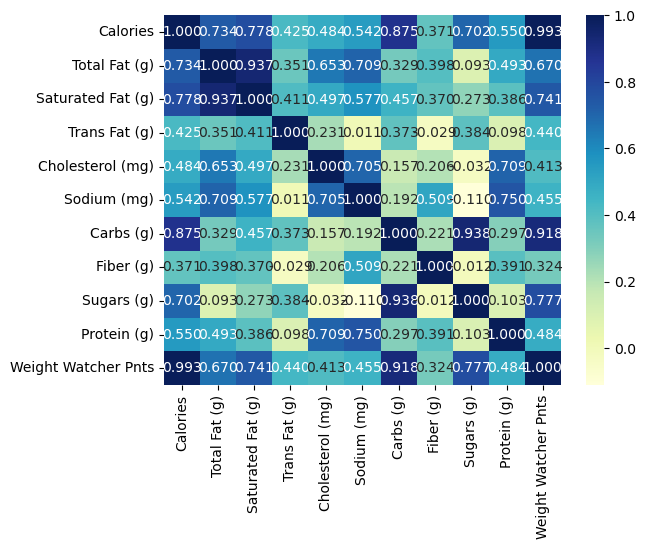

In [46]:
# Изменение цветовой гаммы
sns.heatmap(data_1.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

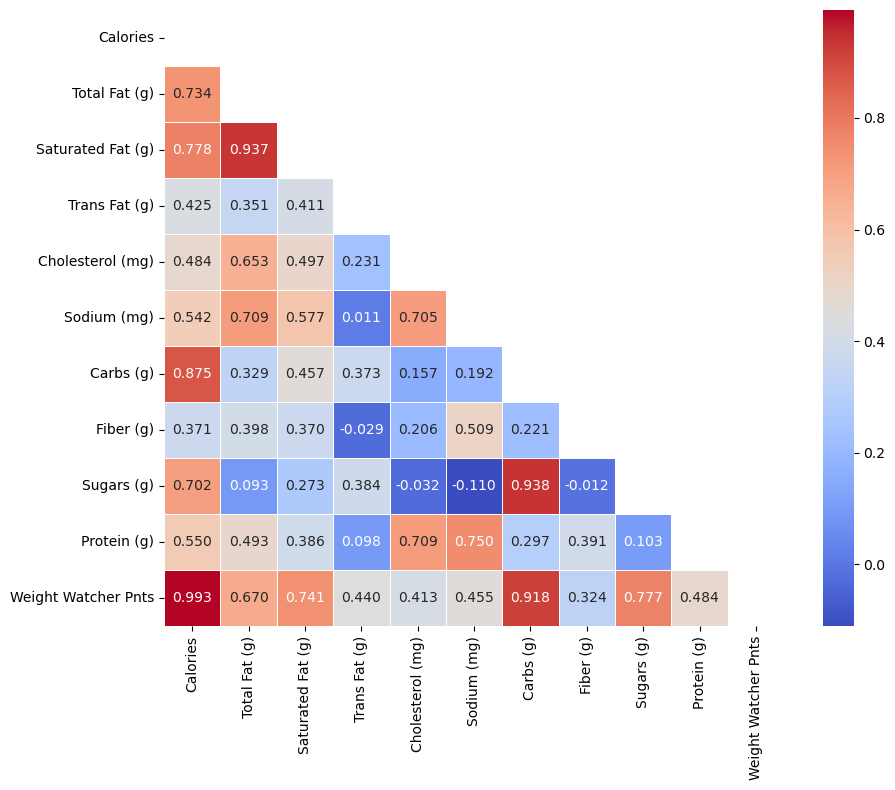

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', linewidths=.5)
plt.show()


<Axes: >

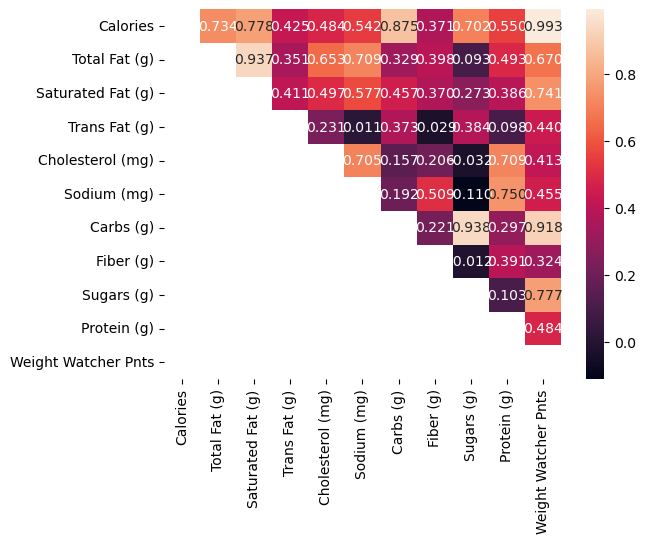

In [53]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

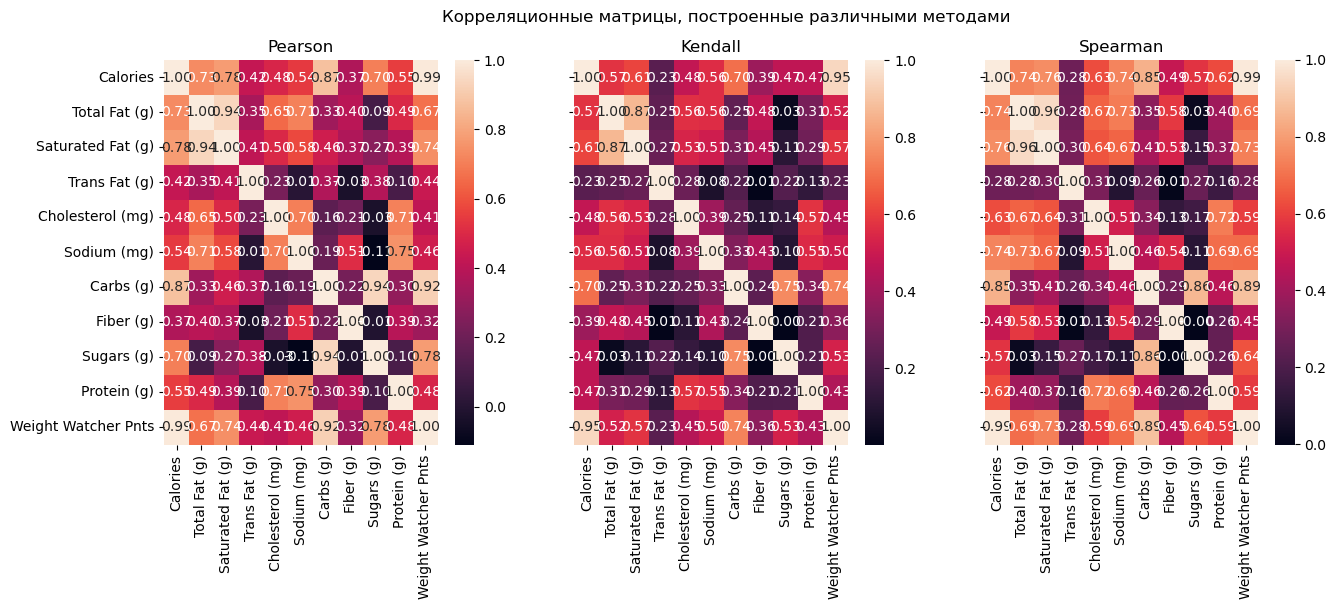

In [51]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data_1.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data_1.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data_1.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<Axes: >

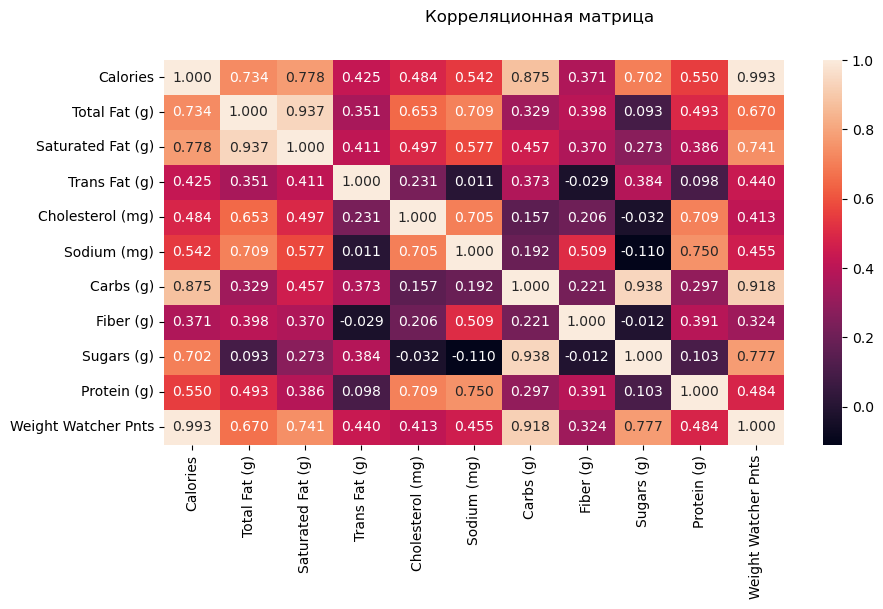

In [54]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data_1.corr(), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Humidity и HumidityRatio, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

# Дополнительные ссылки на обучающие ноутбуки

[The Best Tutorial for Beginners (Kaggle)](https://www.kaggle.com/getting-started/71679)